In [125]:
import pandas as pd
from pyhive import hive
from matplotlib import pyplot as plt

#连接hive
host='*****'
username='*****'
password='*****'
port=10000
data_base_name='*****'

conn = hive.Connection(host=host,
                       port=port,
                       auth="CUSTOM",
                       database=data_base_name,
                       username=username,
                       password=password)

#读取数据
sql_order = 'select * from *****  where dt = "2022-06-12" or dt = "2022-06-19"'
train_data = pd.read_sql(sql_order, conn)
# conn.close

print(train_data.info())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [126]:
#训练数据基本信息
train_data.describe()

,station_id,7_day_order_count,position_type,operate_construction,station_type,equipment_count,ac_count,dc_count,d_house_count,d_work_count,...,three_order_3km,wl_order_3km,xx_order_3km,tld_order_3km,xj_order_3km,equipment_count_3km,dc_count_3km,d_total_equipment_count,d_total_dc_count,average_fee
count,6.335900e+04,63359.000000,10565.000000,63357.000000,63359.000000,63359.000000,63359.000000,63359.000000,63359.000000,63359.000000,...,63359.000000,63359.000000,63359.000000,63359.000000,63359.000000,63359.000000,63359.000000,63359.000000,63359.000000,63359.000000
mean,7.070734e+16,248.016856,0.034643,65.637262,4.645086,8.582790,2.619675,7.979924,507.885967,2438.090263,...,2715.581717,0.074338,497.388690,505.625894,794.051958,175.151281,147.325384,1317.894932,1116.519800,1.215186
std,5.759792e+17,593.325669,0.182882,107.536834,29.458632,11.381331,8.755155,11.121108,314.820720,1607.009903,...,5135.784286,0.550460,1570.465568,1102.872799,2221.436279,246.472336,212.441383,1780.964068,1448.788558,2.485448
min,1.010533e+08,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.829010e+14,5.000000,0.000000,2.000000,1.000000,3.000000,0.000000,2.000000,197.000000,1441.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,142.000000,112.000000,1.030000
50%,1.126324e+15,45.000000,0.000000,6.000000,1.000000,6.000000,0.000000,4.000000,481.000000,2004.000000,...,564.000000,0.000000,0.000000,0.000000,0.000000,69.000000,54.000000,581.000000,475.000000,1.180000
75%,1.689878e+15,228.000000,0.000000,11.000000,1.000000,10.000000,2.000000,10.000000,881.000000,3005.000000,...,3123.000000,0.000000,256.000000,464.000000,288.000000,243.000000,199.000000,1983.000000,1781.000000,1.360000
max,8.072140e+18,22767.000000,1.000000,255.000000,255.000000,370.000000,350.000000,292.000000,899.000000,8115.000000,...,72284.000000,15.000000,36670.000000,10947.000000,33270.000000,2121.000000,1965.000000,9353.000000,7334.000000,440.670000


In [127]:
#删除周订单量为0的数据
train_data.rename(columns={"7_day_order_count":"week_day_order_count"},inplace=True)
train_data = train_data.drop(train_data[train_data.week_day_order_count == 0].index)

In [128]:
train_data.describe()

,station_id,week_day_order_count,position_type,operate_construction,station_type,equipment_count,ac_count,dc_count,d_house_count,d_work_count,...,three_order_3km,wl_order_3km,xx_order_3km,tld_order_3km,xj_order_3km,equipment_count_3km,dc_count_3km,d_total_equipment_count,d_total_dc_count,average_fee
count,5.160800e+04,51608.000000,8463.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.00000,51608.000000,51608.000000,...,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000
mean,2.967013e+16,304.489614,0.042302,61.033890,4.639862,8.965994,2.526798,8.49969,508.187142,2447.671446,...,2780.356379,0.072973,508.721477,513.291563,813.468571,171.782863,147.236436,1287.684002,1105.607503,1.229371
std,3.815671e+17,644.203915,0.201289,104.486757,29.452902,11.330795,8.571503,11.03095,316.772452,1645.032552,...,5229.032739,0.543266,1634.295372,1114.440013,2281.902057,243.123766,212.672784,1730.876031,1437.475300,2.748477
min,3.527404e+13,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.829077e+14,21.000000,0.000000,2.000000,1.000000,4.000000,0.000000,2.00000,196.000000,1419.000000,...,39.000000,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,131.000000,104.000000,1.030000
50%,1.126136e+15,81.000000,0.000000,6.000000,1.000000,6.000000,0.000000,5.00000,485.000000,1993.000000,...,610.000000,0.000000,0.000000,0.000000,0.000000,66.000000,53.000000,570.000000,476.000000,1.180000
75%,1.689790e+15,319.000000,0.000000,11.000000,1.000000,10.000000,2.000000,10.00000,881.000000,3020.000000,...,3186.000000,0.000000,250.000000,471.250000,335.000000,236.000000,196.000000,1928.000000,1777.000000,1.360000
max,8.072140e+18,22767.000000,1.000000,255.000000,255.000000,370.000000,350.000000,292.00000,899.000000,8115.000000,...,72284.000000,15.000000,36670.000000,10947.000000,33270.000000,2087.000000,1944.000000,9353.000000,7334.000000,440.670000


In [129]:
columns = list(train_data.columns)
print(len(columns))
columns

73


['station_id',
 'station_name',
 'week_day_order_count',
 'city',
 'city_code',
 'district',
 'district_code',
 'position_type',
 'operate_construction',
 'station_type',
 'equipment_count',
 'ac_count',
 'dc_count',
 'power_count',
 'fee_info',
 'payment',
 'd_house_count',
 'd_work_count',
 'd_shopping_count',
 'd_traffic_count',
 'd_scenic_count',
 'd_populace',
 'd_area',
 'd_populace_density',
 'c_total_invertory_count',
 'c_2021_total_count',
 'c_2021_down_year',
 'c_tsl_total_count',
 'c_wl_total_count',
 'c_xp_total_count',
 'd_total_station_count',
 'd_tsl_station_count',
 'd_wl_station_count',
 'd_xp_station_count',
 'd_xx_station_count',
 'd_tld_station_count',
 'd_kms_station_count',
 'd_xj_station_count',
 'd_7day_total_order_count',
 'd_7day_haohan_order_count',
 'd_7day_three_order_count',
 'd_7day_wl_order_count',
 'd_7day_xx_order_count',
 'd_7day_tld_order_count',
 'd_7day_xj_order_count',
 'c_is_restrict',
 'd_park_count',
 'house_3km',
 'work_3km',
 'shopping_3km',


In [130]:
pd.set_option('display.max_rows', None)
train_data.isnull().sum()

station_id                       0
station_name                     0
week_day_order_count             0
city                             0
city_code                       54
district                         2
district_code                    0
position_type                43145
operate_construction             0
station_type                     0
equipment_count                  0
ac_count                         0
dc_count                         0
power_count                     35
fee_info                       694
payment                      51608
d_house_count                    0
d_work_count                     0
d_shopping_count                 0
d_traffic_count                  0
d_scenic_count                   0
d_populace                       0
d_area                           0
d_populace_density               0
c_total_invertory_count          0
c_2021_total_count               0
c_2021_down_year                 0
c_tsl_total_count                0
c_wl_total_count    

In [132]:
train_data.head()

,station_id,station_name,week_day_order_count,city,city_code,district,district_code,position_type,operate_construction,station_type,...,wl_order_3km,xx_order_3km,tld_order_3km,xj_order_3km,equipment_count_3km,dc_count_3km,d_total_equipment_count,d_total_dc_count,average_fee,dt
0,1690751108474928,山东省日照市东港区后村公共快充站,34,日照市,371100,东港区,371102,NaN,2.0,1,...,0,0,0,0,2,2,353,329,1.18,2022-06-12
1,282572462057520,山东省日照市西站公共充电站,120,日照市,371100,东港区,371102,NaN,6.0,1,...,0,0,0,0,13,13,351,326,1.16,2022-06-12
2,1128048405044944,晋江中骏四季花城迅源充电站,306,泉州市,350500,晋江市,350582,0.0,1.0,1,...,0,247,924,3235,163,149,2100,2163,0.89,2022-06-12
3,1690363616651312,安徽省芜湖市鸠江区南翔万商B地块停车场充电站,83,芜湖市,340200,鸠江区,340207,NaN,2.0,1,...,0,0,419,0,113,85,367,235,1.16,2022-06-12
4,1689773953083440,沈海高速朴里服务区公共充电站（海口方向）,493,泉州市,350500,晋江市,350582,NaN,11.0,1,...,0,0,0,0,18,18,2104,2167,1.51,2022-06-12


In [133]:
train_data.describe()

,station_id,week_day_order_count,position_type,operate_construction,station_type,equipment_count,ac_count,dc_count,d_house_count,d_work_count,...,three_order_3km,wl_order_3km,xx_order_3km,tld_order_3km,xj_order_3km,equipment_count_3km,dc_count_3km,d_total_equipment_count,d_total_dc_count,average_fee
count,5.160800e+04,51608.000000,8463.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.00000,51608.000000,51608.000000,...,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000,51608.000000
mean,2.967013e+16,304.489614,0.042302,61.033890,4.639862,8.965994,2.526798,8.49969,508.187142,2447.671446,...,2780.356379,0.072973,508.721477,513.291563,813.468571,171.782863,147.236436,1287.684002,1105.607503,1.229371
std,3.815671e+17,644.203915,0.201289,104.486757,29.452902,11.330795,8.571503,11.03095,316.772452,1645.032552,...,5229.032739,0.543266,1634.295372,1114.440013,2281.902057,243.123766,212.672784,1730.876031,1437.475300,2.748477
min,3.527404e+13,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.829077e+14,21.000000,0.000000,2.000000,1.000000,4.000000,0.000000,2.00000,196.000000,1419.000000,...,39.000000,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,131.000000,104.000000,1.030000
50%,1.126136e+15,81.000000,0.000000,6.000000,1.000000,6.000000,0.000000,5.00000,485.000000,1993.000000,...,610.000000,0.000000,0.000000,0.000000,0.000000,66.000000,53.000000,570.000000,476.000000,1.180000
75%,1.689790e+15,319.000000,0.000000,11.000000,1.000000,10.000000,2.000000,10.00000,881.000000,3020.000000,...,3186.000000,0.000000,250.000000,471.250000,335.000000,236.000000,196.000000,1928.000000,1777.000000,1.360000
max,8.072140e+18,22767.000000,1.000000,255.000000,255.000000,370.000000,350.000000,292.00000,899.000000,8115.000000,...,72284.000000,15.000000,36670.000000,10947.000000,33270.000000,2087.000000,1944.000000,9353.000000,7334.000000,440.670000


In [134]:
#选择特征
print(train_data.corr()["week_day_order_count"].sort_values(ascending = False))
sort_feature = dict(train_data.corr()["week_day_order_count"].sort_values(ascending = False))
imp_feature = [key for key, val in sort_feature.items() if val >= 0.12][1:]
print(imp_feature)


week_day_order_count         1.000000
dc_count                     0.696623
equipment_count              0.385437
three_order_3km              0.331317
total_order_3km              0.331220
dc_count_3km                 0.311013
d_7day_total_order_count     0.295055
d_7day_three_order_count     0.294964
xj_order_3km                 0.269421
operate_construction         0.267460
d_total_dc_count             0.261421
d_7day_tld_order_count       0.253921
d_7day_xj_order_count        0.252719
d_7day_xx_order_count        0.235529
d_house_count                0.234721
equipment_count_3km          0.233668
c_xp_total_count             0.225710
d_park_count                 0.216734
d_populace_density           0.209720
d_shopping_count             0.205979
station_total_3km            0.203523
d_work_count                 0.201907
xx_order_3km                 0.196325
tld_order_3km                0.195353
d_total_equipment_count      0.194858
d_xj_station_count           0.187792
shopping_3km

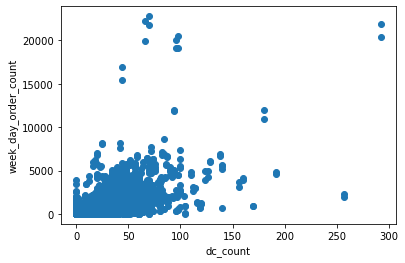

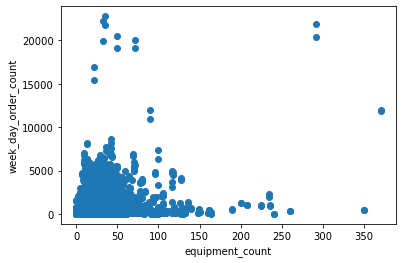

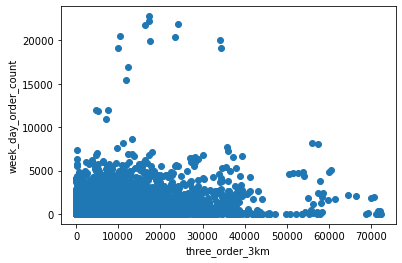

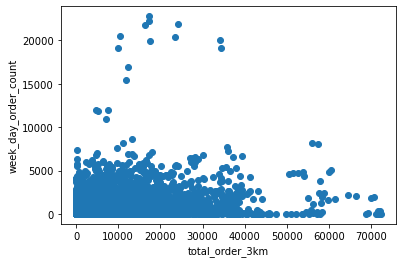

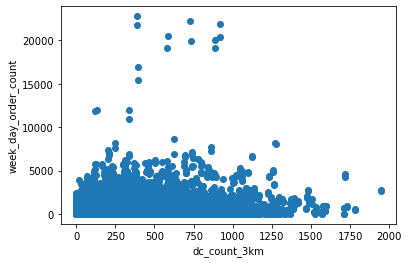

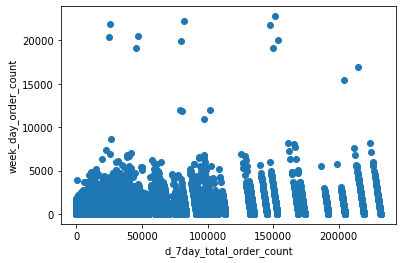

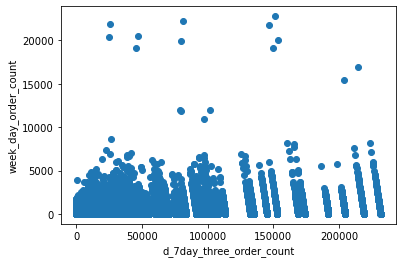

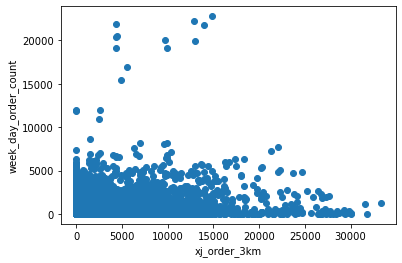

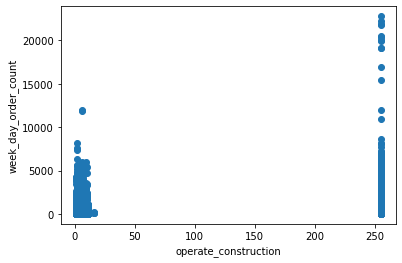

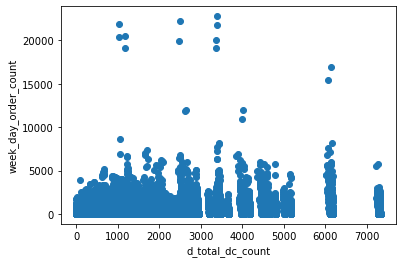

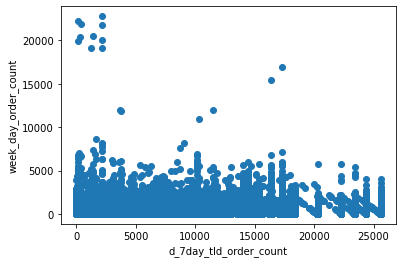

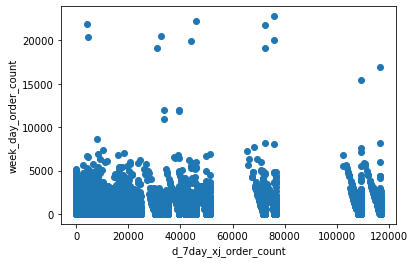

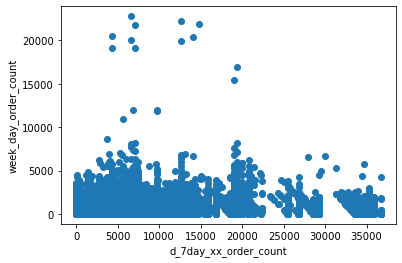

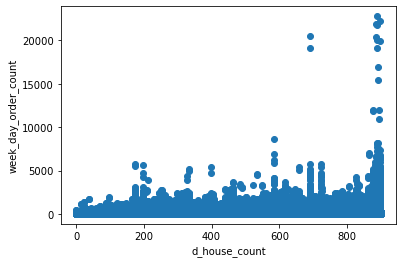

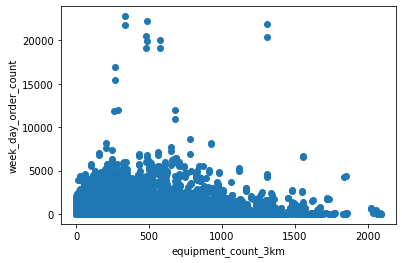

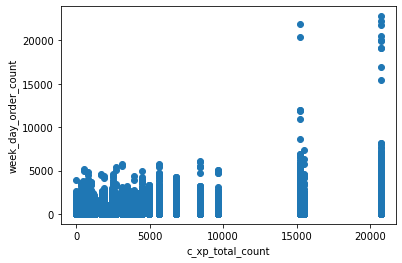

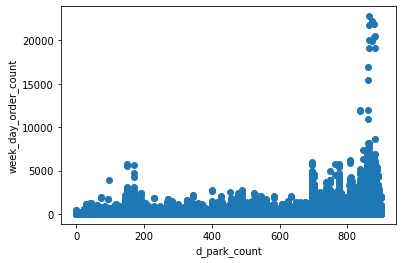

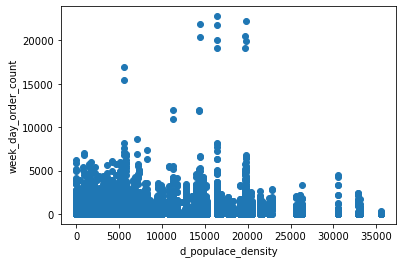

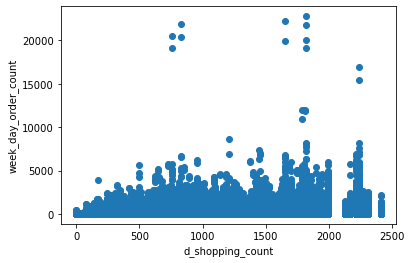

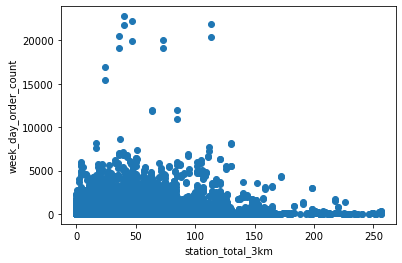

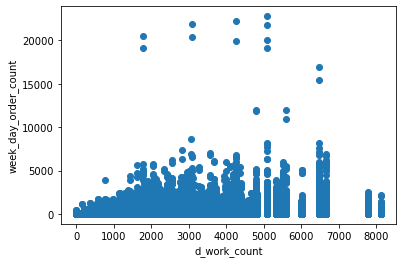

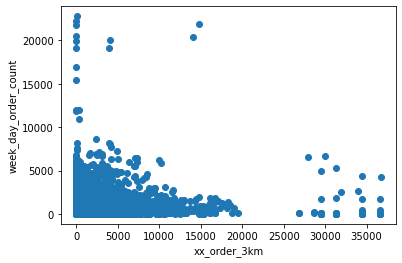

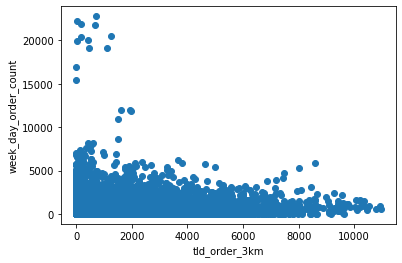

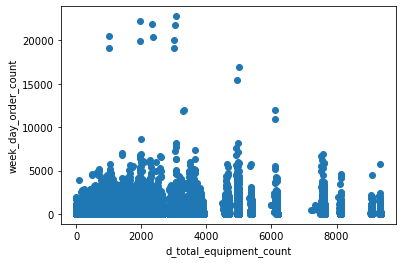

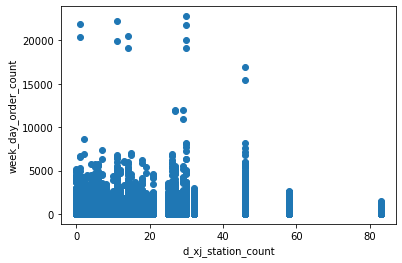

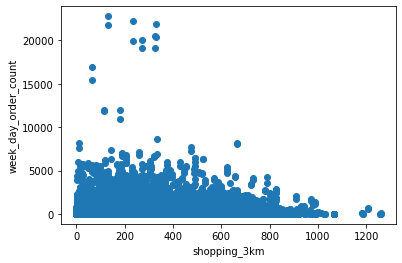

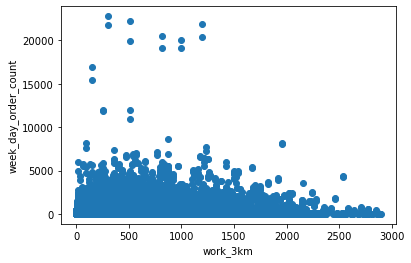

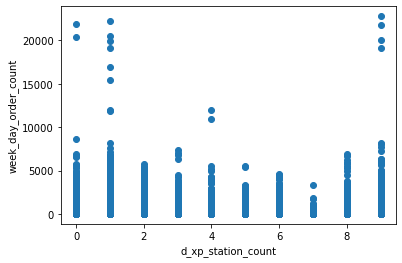

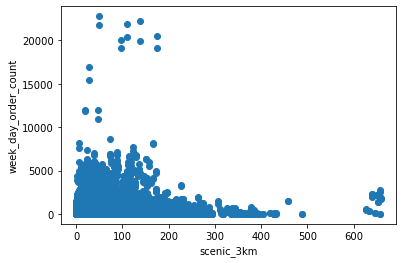

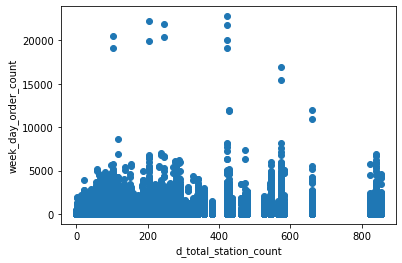

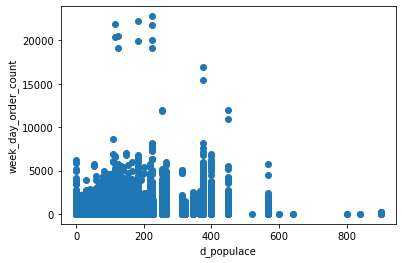

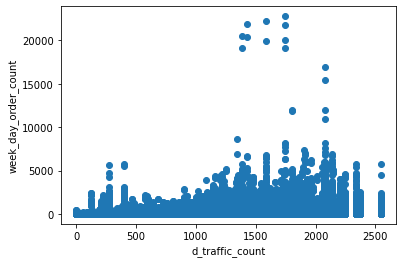

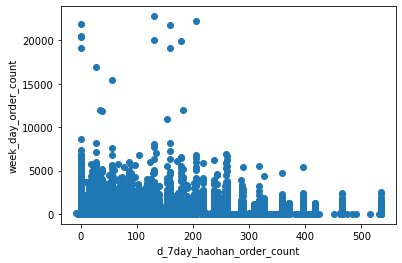

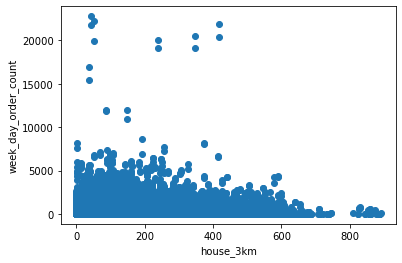

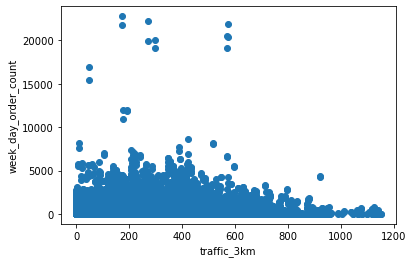

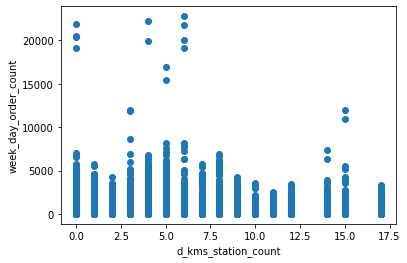

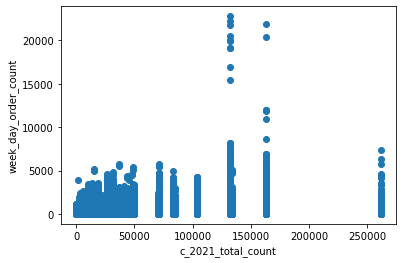

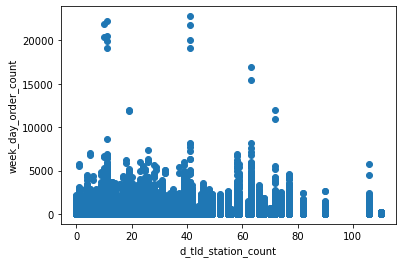

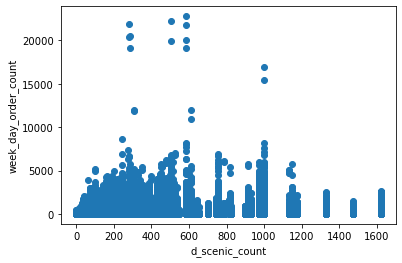

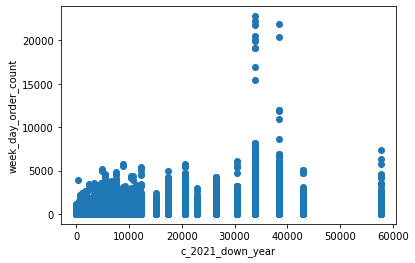

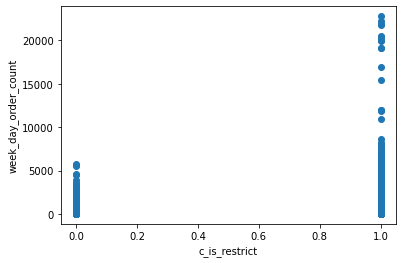

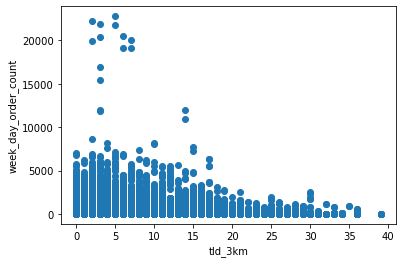

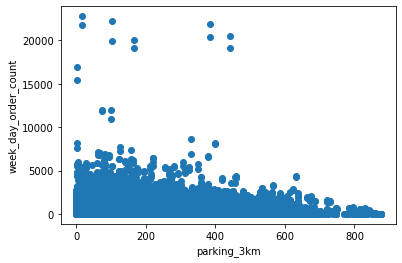

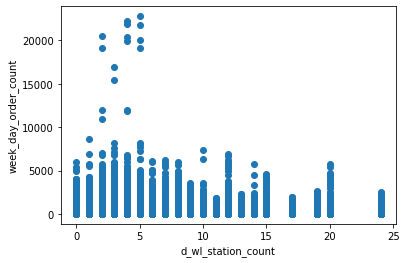

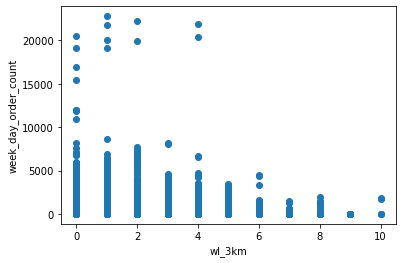

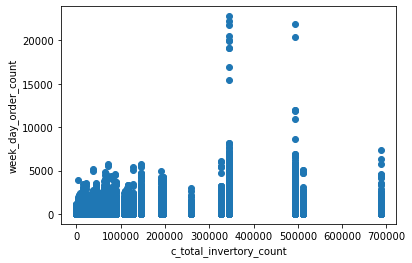

In [135]:
#绘制散点图
for i in range(len(imp_feature)):
        plt.scatter(train_data[imp_feature[i]], train_data["week_day_order_count"])
        plt.xlabel(imp_feature[i])
        plt.ylabel("week_day_order_count")
        name = imp_feature[i]+"_"+"week_day_order_count"
        plt.savefig("C:/Users/IdeaProjects/final/散点图/"+name,  dpi=200)
        plt.show()

In [136]:
print(imp_feature)

['dc_count', 'equipment_count', 'three_order_3km', 'total_order_3km', 'dc_count_3km', 'd_7day_total_order_count', 'd_7day_three_order_count', 'xj_order_3km', 'operate_construction', 'd_total_dc_count', 'd_7day_tld_order_count', 'd_7day_xj_order_count', 'd_7day_xx_order_count', 'd_house_count', 'equipment_count_3km', 'c_xp_total_count', 'd_park_count', 'd_populace_density', 'd_shopping_count', 'station_total_3km', 'd_work_count', 'xx_order_3km', 'tld_order_3km', 'd_total_equipment_count', 'd_xj_station_count', 'shopping_3km', 'work_3km', 'd_xp_station_count', 'scenic_3km', 'd_total_station_count', 'd_populace', 'd_traffic_count', 'd_7day_haohan_order_count', 'house_3km', 'traffic_3km', 'd_kms_station_count', 'c_2021_total_count', 'd_tld_station_count', 'd_scenic_count', 'c_2021_down_year', 'c_is_restrict', 'tld_3km', 'parking_3km', 'd_wl_station_count', 'wl_3km', 'c_total_invertory_count']


In [137]:
#数据集打乱
from sklearn.utils import shuffle
train_data = shuffle(train_data,random_state = 19)


In [138]:
#划分训练集测试集
from sklearn.model_selection import train_test_split
week_day_order_count = train_data.week_day_order_count
x_train, x_test, y_train, y_test = train_test_split(train_data[imp_feature],week_day_order_count, test_size=0.2, random_state = 10)

In [139]:
#LR
from sklearn.metrics import mean_squared_error, make_scorer, mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
print(mean_squared_error(y_test, lr_pred) ** 0.5)
y = pd.DataFrame(y_test)
lr_pred = pd.DataFrame(lr_pred, columns=["lr_pred"])
y.reset_index(drop=True, inplace=True)
lr_pred.reset_index(drop=True, inplace=True)
result = pd.concat([y, lr_pred], axis=1, ignore_index=True)
# print(result)

463.11905752884707


In [140]:
#随机森林
rf_model = RandomForestRegressor(n_estimators=320, random_state=0)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print(mean_squared_error(y_test, rf_pred) ** 0.5)

258.69552814633215


In [ ]:
rf_pred = pd.DataFrame(rf_pred, columns=["rf_pred"])
rf_pred.reset_index(drop=True, inplace=True)
rf_result = pd.concat([y, rf_pred], axis=1, ignore_index=True)
print(rf_result)

In [142]:
rf_pred_x_train = rf_model.predict(x_train)
print(mean_squared_error(y_train, rf_pred_x_train) ** 0.5)

94.91893446813904


In [115]:
#lgbm
# coding: utf-8
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
print('开始训练...')
# 直接初始化LGBMRegressor
# 这个LightGBM的Regressor和sklearn中其他Regressor基本是一致的
gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=62,
                        learning_rate=0.05,
                        n_estimators=200)

# 使用fit函数拟合
gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

# 预测
print('开始预测...')
lgb_y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration_)
# 评估预测结果
print('预测结果的rmse是:')
print(mean_squared_error(y_test, lgb_y_pred) ** 0.5)


开始训练...
[1]	valid_0's l1: 339.062	valid_0's l2: 437773
[2]	valid_0's l1: 326.905	valid_0's l2: 408739
[3]	valid_0's l1: 315.475	valid_0's l2: 382355
[4]	valid_0's l1: 304.794	valid_0's l2: 358617
[5]	valid_0's l1: 294.991	valid_0's l2: 339958
[6]	valid_0's l1: 285.814	valid_0's l2: 323161
[7]	valid_0's l1: 277.259	valid_0's l2: 307883

C:\Users\Liangliang.Xu1.GEELY\Anaconda3\envs\location\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[8]	valid_0's l1: 269.329	valid_0's l2: 294183
[9]	valid_0's l1: 261.779	valid_0's l2: 280548
[10]	valid_0's l1: 254.855	valid_0's l2: 269074
[11]	valid_0's l1: 248.543	valid_0's l2: 258918
[12]	valid_0's l1: 242.212	valid_0's l2: 248684
[13]	valid_0's l1: 236.6	valid_0's l2: 239371
[14]	valid_0's l1: 231.325	valid_0's l2: 231656
[15]	valid_0's l1: 226.467	valid_0's l2: 224568
[16]	valid_0's l1: 221.86	valid_0's l2: 217800
[17]	valid_0's l1: 217.725	valid_0's l2: 211956
[18]	valid_0's l1: 213.756	valid_0's l2: 205846
[19]	valid_0's l1: 210.121	valid_0's l2: 200927
[20]	valid_0's l1: 206.707	valid_0's l2: 196200
[21]	valid_0's l1: 203.669	valid_0's l2: 192176
[22]	valid_0's l1: 200.767	valid_0's l2: 188473
[23]	valid_0's l1: 198.119	valid_0's l2: 185172
[24]	valid_0's l1: 195.471	valid_0's l2: 181346
[25]	valid_0's l1: 193.132	valid_0's l2: 178203
[26]	valid_0's l1: 190.769	valid_0's l2: 175349
[27]	valid_0's l1: 188.545	valid_0's l2: 171568
[28]	valid_0's l1: 186.647	valid_0's l2: 169

In [ ]:
lgb_y_pred = pd.DataFrame(lgb_y_pred, columns=["lgb_y_pred"])
lgb_y_pred.reset_index(drop=True, inplace=True)
lgb_result = pd.concat([y, lgb_y_pred], axis=1, ignore_index=True)
print(lgb_result)

In [117]:
#全量数据集预测
rf_pred_train_data = rf_model.predict(train_data[imp_feature])


In [118]:
print(mean_squared_error(train_data.week_day_order_count, rf_pred_train_data) ** 0.5)

148.13004108822318


In [119]:
train_data["rf_pred"] = rf_pred_train_data

In [120]:
train_data.head()

,station_id,station_name,week_day_order_count,city,city_code,district,district_code,position_type,operate_construction,station_type,...,xx_order_3km,tld_order_3km,xj_order_3km,equipment_count_3km,dc_count_3km,d_total_equipment_count,d_total_dc_count,average_fee,dt,rf_pred
23438,1443889587535536,河北省保定市望都黄庄供电所充电站,7,保定市,130600,望都县,130631,NaN,2.0,1,...,0,0,0,2,2,38,42,1.15,2022-06-12,14.933854
16213,281633743267888,山东省临沂市河东区恒大绿洲充电站,81,临沂市,371300,河东区,371312,NaN,6.0,1,...,0,354,0,56,36,670,387,1.18,2022-06-12,250.712500
490,1690124604237872,辽宁省大连市旅顺区政府公共充电站,448,大连市,210200,旅顺口区,210212,NaN,2.0,1,...,0,0,0,61,18,226,43,0.99,2022-06-12,424.521875
9160,316864152915632,辽宁省大连市长兴岛三堂供电营业所充电站,15,大连市,210200,瓦房店市,210281,NaN,2.0,1,...,0,0,0,23,1,499,56,0.99,2022-06-12,17.865625
1620,281526127376848,南朗供电分局纪念中学充电站#2,54,中山市,442000,南朗街道,442000,NaN,3.0,1,...,0,0,0,24,9,2521,2075,1.04,2022-06-12,53.893750


In [121]:
train_data.to_csv("C:/Users/IdeaProjects/final/pred_rf_train_data.csv",encoding = "utf_8_sig")

In [122]:
#模型存储
import joblib
joblib.dump(rf_model, 'C:/Users/IdeaProjects/final/loan_model_rf.pkl')

['C:/Users/Liangliang.Xu1.GEELY/IdeaProjects/final/loan_model_rf.pkl']

In [123]:
#补充场站相关特征信息
feature_data_rf_predict = train_data[imp_feature]
feature_data_rf_predict["station_id"] = train_data.station_id
feature_data_rf_predict["station_name"] = train_data.station_name
feature_data_rf_predict["city"] = train_data.city
feature_data_rf_predict["district"] = train_data.district
feature_data_rf_predict["week_day_order_count"] = train_data.week_day_order_count
feature_data_rf_predict["dt"] = train_data.dt
feature_data_rf_predict["rf_pred"] = rf_pred_train_data

C:\Users\Liangliang.Xu1.GEELY\Anaconda3\envs\location\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Liangliang.Xu1.GEELY\Anaconda3\envs\location\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Liangliang.Xu1.GEELY\Anaconda3\envs\location\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be

In [124]:
feature_data_rf_predict.to_csv("C:/Users/IdeaProjects/final/feature_data_rf_predict_train_data.csv",encoding = "utf_8_sig")